In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

C:\Users\ngaco\AppData\Local\Temp\ipykernel_10748\583687278.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<ErrorbarContainer object of 3 artists>

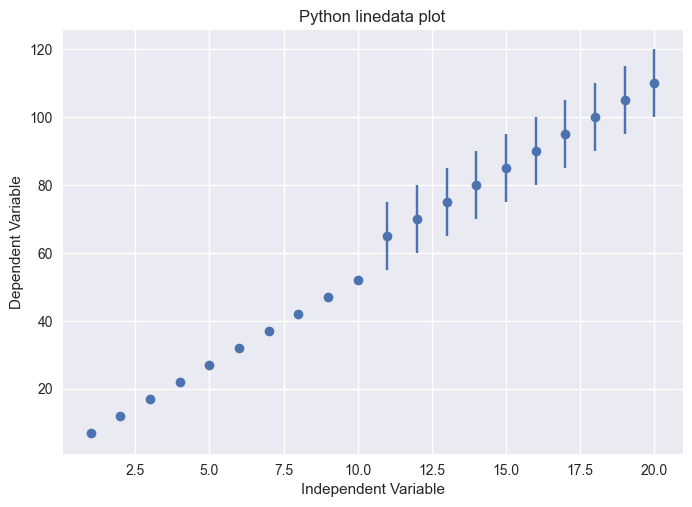

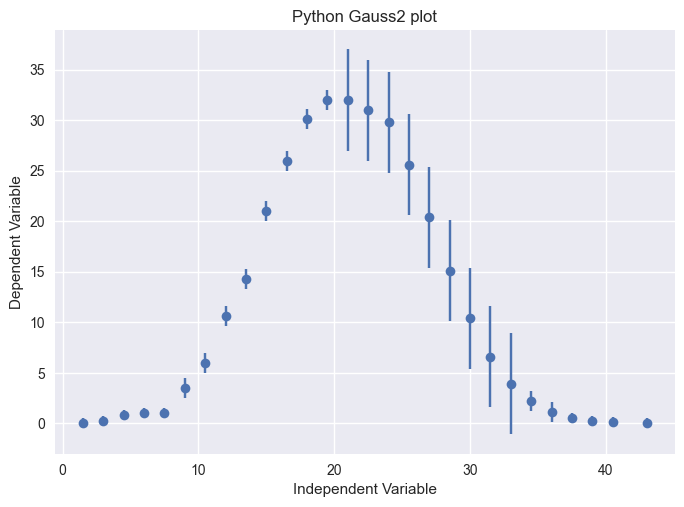

In [10]:
# Load the .dat file
linedata = np.loadtxt("linedata.dat", delimiter="\t")
gauss2 = np.loadtxt("Gauss2.dat", delimiter= "\t")

# Separate the data into the three columns
x_line, x_gauss = linedata[:, 0], gauss2[:, 0]
y_line, y_gauss = linedata[:, 1], gauss2[:, 1]
e_line, e_gauss = linedata[:, 2], gauss2[:, 2]

plt.style.use('seaborn')

plt.figure(1)
plt.title('Python linedata plot')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')

# Use errorbar for scatter plot with error bars for linedata
plt.errorbar(x_line, y_line, yerr=e_line, fmt='o')


plt.figure(2)
plt.title('Python Gauss2 plot')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')

# Use errorbar for scatter plot with error bars for Gauss2
plt.errorbar(x_gauss, y_gauss, yerr=e_gauss, fmt='o', capsize=5)

Now let's fit the data

In [4]:
from scipy.optimize import curve_fit
import math
import numpy as np
import matplotlib.pyplot as plt
import statistics

C:\Users\ngaco\AppData\Local\Temp\ipykernel_11592\2726060651.py:28: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


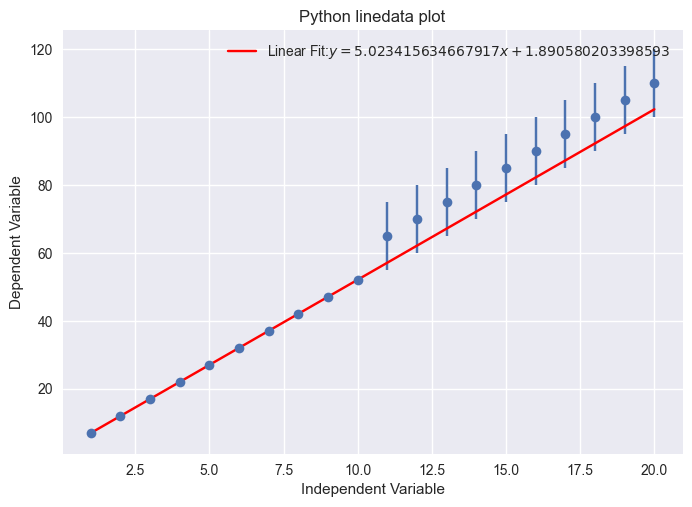

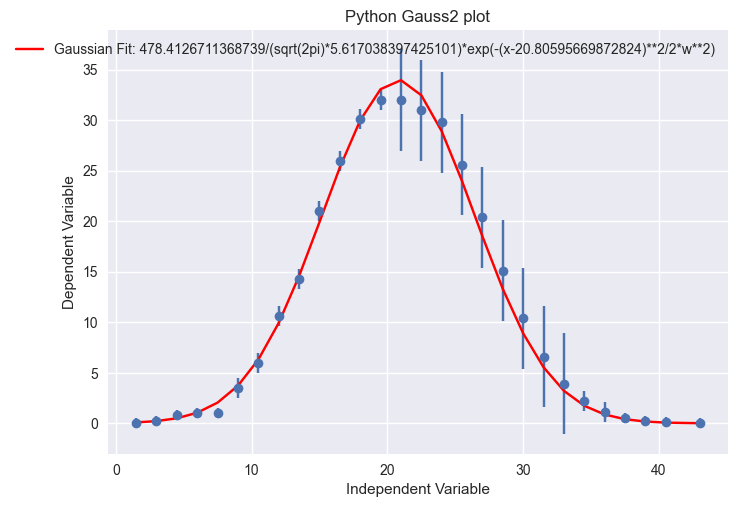

In [9]:
# Load the .dat file
linedata = np.loadtxt("linedata.dat", delimiter="\t")
gauss2 = np.loadtxt("Gauss2.dat", delimiter= "\t")

# Separate the data into the three columns
x_line, x_gauss = linedata[:, 0], gauss2[:, 0]
y_line, y_gauss = linedata[:, 1], gauss2[:, 1]
e_line, e_gauss = linedata[:, 2], gauss2[:, 2]

xg_avg = statistics.mean(x_gauss)

sigma = statistics.stdev(x_gauss)

def linear(x, m, b):
    return m*x + b

lin_params, lin_covariance = curve_fit(linear, x_line, y_line, sigma=e_line, absolute_sigma=True)
lin_param_errors = np.sqrt(np.diag(lin_covariance))
m, b = lin_params

def gaussian(x, x_av, w, A):
    return (A / (w*np.sqrt(2*np.pi))) * np.exp(-(x-x_av)**2 / (2*w**2))

gau_params, gau_covariance = curve_fit(gaussian, x_gauss, y_gauss, sigma=e_gauss, absolute_sigma=True)
gau_param_errors = np.sqrt(np.diag(gau_covariance))
x_av, w, A = gau_params

plt.style.use('seaborn')


plt.figure(1)
plt.title('Python linedata plot')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')

# Use errorbar for scatter plot with error bars for linedata
plt.errorbar(x_line, y_line, yerr=e_line, fmt='o')

# Plot fitted curve
plt.plot(x_line, linear(x_line, *lin_params), 'r-', label=f'Linear Fit:$y ={{{m}}}x+{{{b}}}$')
plt.legend()


plt.figure(2)
plt.title('Python Gauss2 plot')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')

# Use errorbar for scatter plot with error bars for Gauss2
plt.errorbar(x_gauss, y_gauss, yerr=e_gauss, fmt='o', capsize=5)

# Plot fitted curve
plt.plot(x_gauss, gaussian(x_gauss, *gau_params), 'r-', label=f'Gaussian Fit: {A}/(sqrt(2pi)*{w})*exp(-(x-{x_av})**2/2*w**2)')
plt.legend()

plt.show()

In [7]:
def reduced_chisq(y_observed, y_expected, y_err, num_params):
    residuals = (y_observed - y_expected) / y_err
    chi2 = np.sum(residuals**2)
    dof = len(y_observed) - num_params
    return chi2 / dof

# For linedata.dat
fit_values_linear = linear(x_line, *lin_params)
chi2_red_linear = reduced_chisq(y_line, fit_values_linear, e_line, 2)
print(f"Reduced χ² for linedata.dat: {chi2_red_linear:.2f}")

# For Gauss2.dat
fit_values_gaussian = gaussian(x_gauss, *gau_params)
chi2_red_gaussian = reduced_chisq(y_gauss, fit_values_gaussian, e_gauss, 3)
print(f"Reduced χ² for Gauss2.dat: {chi2_red_gaussian:.2f}")

Reduced χ² for linedata.dat: 0.34
Reduced χ² for Gauss2.dat: 0.38
